# Assignment 8

In [1]:
#Instalamos lo necesario
!pip install geopandas matplotlib
!pip install folium

In [2]:
#Importamos lo necesario
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import matplotlib.patches as mpatches

In [3]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### **1. Import the data located at this [link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.**

In [4]:
# Importando la data
df_dengue = pd.read_csv(r"../../_data/data_dengue_peru.csv")

/var/folders/rb/f0hs9z3x3qs022rbhv3xf4gh0000gp/T/ipykernel_4381/1533598287.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dengue = pd.read_csv(r"../../_data/data_dengue_peru.csv")


In [5]:
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### **2. Generate ubigeo for Departments and Provinces taking the first two and four numbers.**

In [6]:
# Primero, creamos una nueva variable string 'ubigeo_1' a partir de la variable 'ubigeo' que es int. 
df_dengue['ubigeo_1'] = df_dengue['Ubigeo'].astype(str)

In [7]:
# Antes de extraer los digitos para crear el ubigeo del departamento y provincia, debemos de asegurarnos que la variable 
# ubigeo contenga 6 digitos.
# Para ello, generamos una función en la que adicione un cero al inicio del ubigeo si dicha variable ubigeo tiene solo 5 digitos
# y que mantenga el ubigeo si es que tiene los 6 digitos.
def seis_digitos(ubigeo):
    if len(ubigeo) == 5:
        return "0" + ubigeo
    else:
        return ubigeo

In [8]:
# Aplicando la funcion a la variable ubigeo_1 de la base df_dengue
df_dengue['ubigeo_1'] = df_dengue['ubigeo_1'].apply(seis_digitos)

In [9]:
# viendo la variable ubigeo_1. Se observa que para las observaciones que tenian 5 digitos se les agregó un cero al inicio para así
# hacer que la variable tenga 6 digitos.
df_dengue['ubigeo_1']

0         080914
1         180101
2         180101
3         080914
4         080914
           ...  
172139    170203
172140    170303
172141    170203
172142    170303
172143    170303
Name: ubigeo_1, Length: 172144, dtype: object

In [10]:
# Creando la variable ubigeo_depa con los dos primeros dos digitos de la variable ubigeo_1
df_dengue['ubigeo_depa'] = df_dengue['ubigeo_1'].str[:2]

# Creando la variable ubigeo_prov con los dos primeros dos digitos de la variable ubigeo_1
df_dengue['ubigeo_prov'] = df_dengue['ubigeo_1'].str[:4]

In [11]:
# Viendo la variable ubigeo_depa. Como se puede observar, esta variable ubigeo_depa muestra los dos primeros digitos de la
# variable ubigeo_1 asociadas al departamento.
df_dengue['ubigeo_depa']

0         08
1         18
2         18
3         08
4         08
          ..
172139    17
172140    17
172141    17
172142    17
172143    17
Name: ubigeo_depa, Length: 172144, dtype: object

In [12]:
# Viendo la variable ubigeo_prov. Como se percibe, esta variable ubigeo_prov muestra los cuatro primeros digitos 
# de la variable ubigeo_1 relacionados a la provincia.
df_dengue['ubigeo_prov']

0         0809
1         1801
2         1801
3         0809
4         0809
          ... 
172139    1702
172140    1703
172141    1702
172142    1703
172143    1703
Name: ubigeo_prov, Length: 172144, dtype: object

In [13]:
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_1,ubigeo_depa,ubigeo_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,0809
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,1703


### **3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend.**

In [14]:
#Primero modificamos la data que contiene los casos de dengue 
df1_dengue=df_dengue.drop("Ubigeo", axis=1)
df1_dengue = df1_dengue.rename({'ubigeo_1':'UBIGEO'}, axis =1)
df1_dengue = df1_dengue[df1_dengue['Año'] == 2021]

In [15]:
df1_dengue.head(10)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa,ubigeo_prov
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,NaN,180101,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,NaN,180101,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,NaN,150112,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,NaN,150143,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,NaN,150103,15,1501
9,2021,41,Dengue,LIMA,CARABAYLLO,LIMA,NaN,150106,15,1501
10,2021,42,Dengue,LIMA,INDEPENDENCIA,LIMA,NaN,150112,15,1501
11,2021,42,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,NaN,150143,15,1501
12,2021,42,Dengue,LIMA,ATE,LIMA,NaN,150103,15,1501
13,2021,42,Dengue,LIMA,CARABAYLLO,LIMA,NaN,150106,15,1501


In [16]:
#Importamos el shape file a nivel de distrito
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps.head(2)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."


In [17]:
#Seleccionamos las columnas mas relevantes  
maps1 = maps[['UBIGEO', 'geometry']]
maps1.head(5)

,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


In [18]:
#Hacemos el merge del shape file con la base de casos
df_m = pd.merge(maps1, df1_dengue, on="UBIGEO")
df_m.head(5)

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,ubigeo_depa,ubigeo_prov
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1.0,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0.0,14,1401
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,42,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,43,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401


In [19]:
#Procedemos a reemplazar los datos NA con -1, para ello verificamos si el valor no es una cadena de texto
df_m['Casos'] = df_m['Casos'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df_m['Casos'] = df_m['Casos'].fillna(-1).astype(int)
df_m.head(3)

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,ubigeo_depa,ubigeo_prov
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,14,1401
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,-1,14,1401


In [20]:
#Elimino las filas que tienen -1 en el la columna "Casos"
df_m = df_m[df_m['Casos'] >= 0]
df_m.head(3)

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,ubigeo_depa,ubigeo_prov
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,14,1401
15,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,1,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,14,1401


In [21]:
#Procedo a hacer un collapse para mantener una sola observación por distrito sumando los casos de las semanas

# Crear un diccionario con las operaciones para cada columna
operations = {col: 'first' for col in df_m.columns if col != 'UBIGEO'}
operations['Casos'] = 'sum'  # La columna 'Casos' se sumará

# Sumar los casos de dengue por distrito y mantener las demás columnas
df_coll = df_m.groupby('UBIGEO').agg(operations).reset_index()
df_coll

#Borro columna semana
df_coll=df_coll.drop("Semana", axis=1)

df_coll

,UBIGEO,geometry,Año,Eventos o daños,Departamento,Distrito,Provincia,Casos,ubigeo_depa,ubigeo_prov
0,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178...",2021,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0,01,0101
1,010201,"POLYGON ((-78.54199 -5.48418, -78.54093 -5.485...",2021,Dengue,AMAZONAS,BAGUA,BAGUA,474,01,0102
2,010202,"POLYGON ((-78.46184 -5.17378, -78.46005 -5.173...",2021,Dengue,AMAZONAS,ARAMANGO,BAGUA,25,01,0102
3,010203,"POLYGON ((-78.32548 -5.56151, -78.32598 -5.562...",2021,Dengue,AMAZONAS,COPALLIN,BAGUA,38,01,0102
4,010204,"POLYGON ((-78.48046 -5.59582, -78.47907 -5.596...",2021,Dengue,AMAZONAS,EL PARCO,BAGUA,8,01,0102
...,...,...,...,...,...,...,...,...,...,...
464,250302,"POLYGON ((-75.14649 -8.53886, -75.14614 -8.544...",2021,Dengue,UCAYALI,IRAZOLA,PADRE ABAD,26,25,2503
465,250303,"POLYGON ((-75.45297 -8.21007, -75.45304 -8.210...",2021,Dengue,UCAYALI,CURIMANA,PADRE ABAD,32,25,2503
466,250304,"POLYGON ((-75.01663 -8.44514, -75.01650 -8.445...",2021,Dengue,UCAYALI,NESHUYA,PADRE ABAD,14,25,2503
467,250305,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739...",2021,Dengue,UCAYALI,ALEXANDER VON HUMBOLDT,PADRE ABAD,2,25,2503


In [22]:
#Procedemos a volver a mergear la data df_coll con el shapefile maps1, para tener NA en la columna "Casos" para aquellos
#distritos que no aparecen en la data df_coll
df_coll1 = pd.merge(maps1, df_coll, on="UBIGEO", how='left')
df_coll1=df_coll1.drop("geometry_y",axis=1)
df_coll1=df_coll1.rename({'geometry_x':'geometry'}, axis =1 )
df_coll1

,UBIGEO,geometry,Año,Eventos o daños,Departamento,Distrito,Provincia,Casos,ubigeo_depa,ubigeo_prov
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

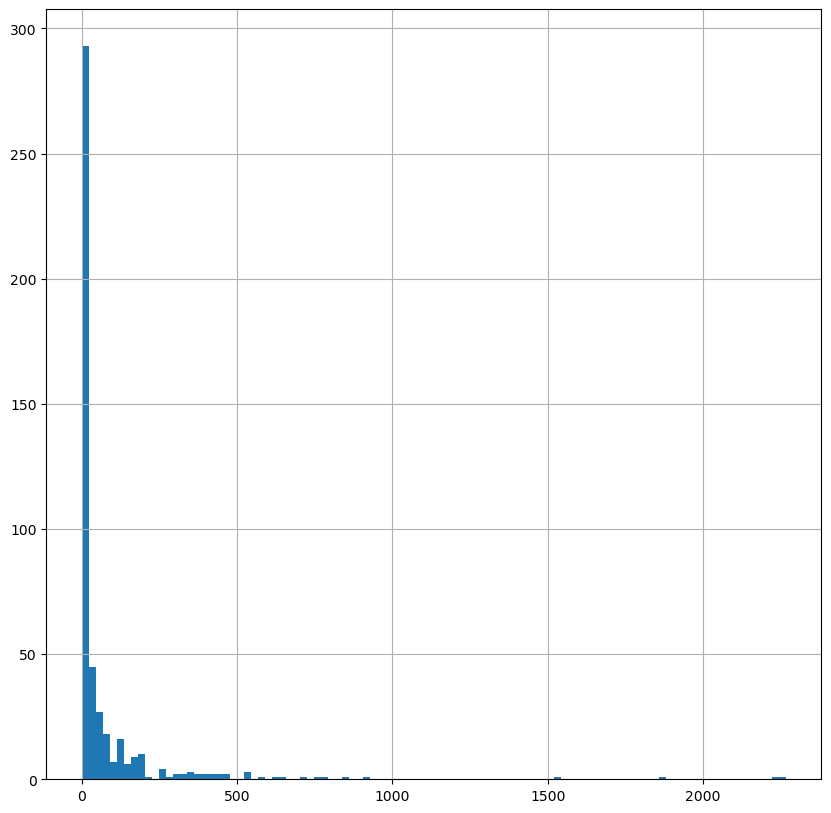

In [23]:
# Ahora bien, antes de realizar el gráfico verificamos la distribución de nuestra serie 
fig, ax = plt.subplots(figsize=(10, 10))
df_coll1["Casos"].hist(bins = 100)

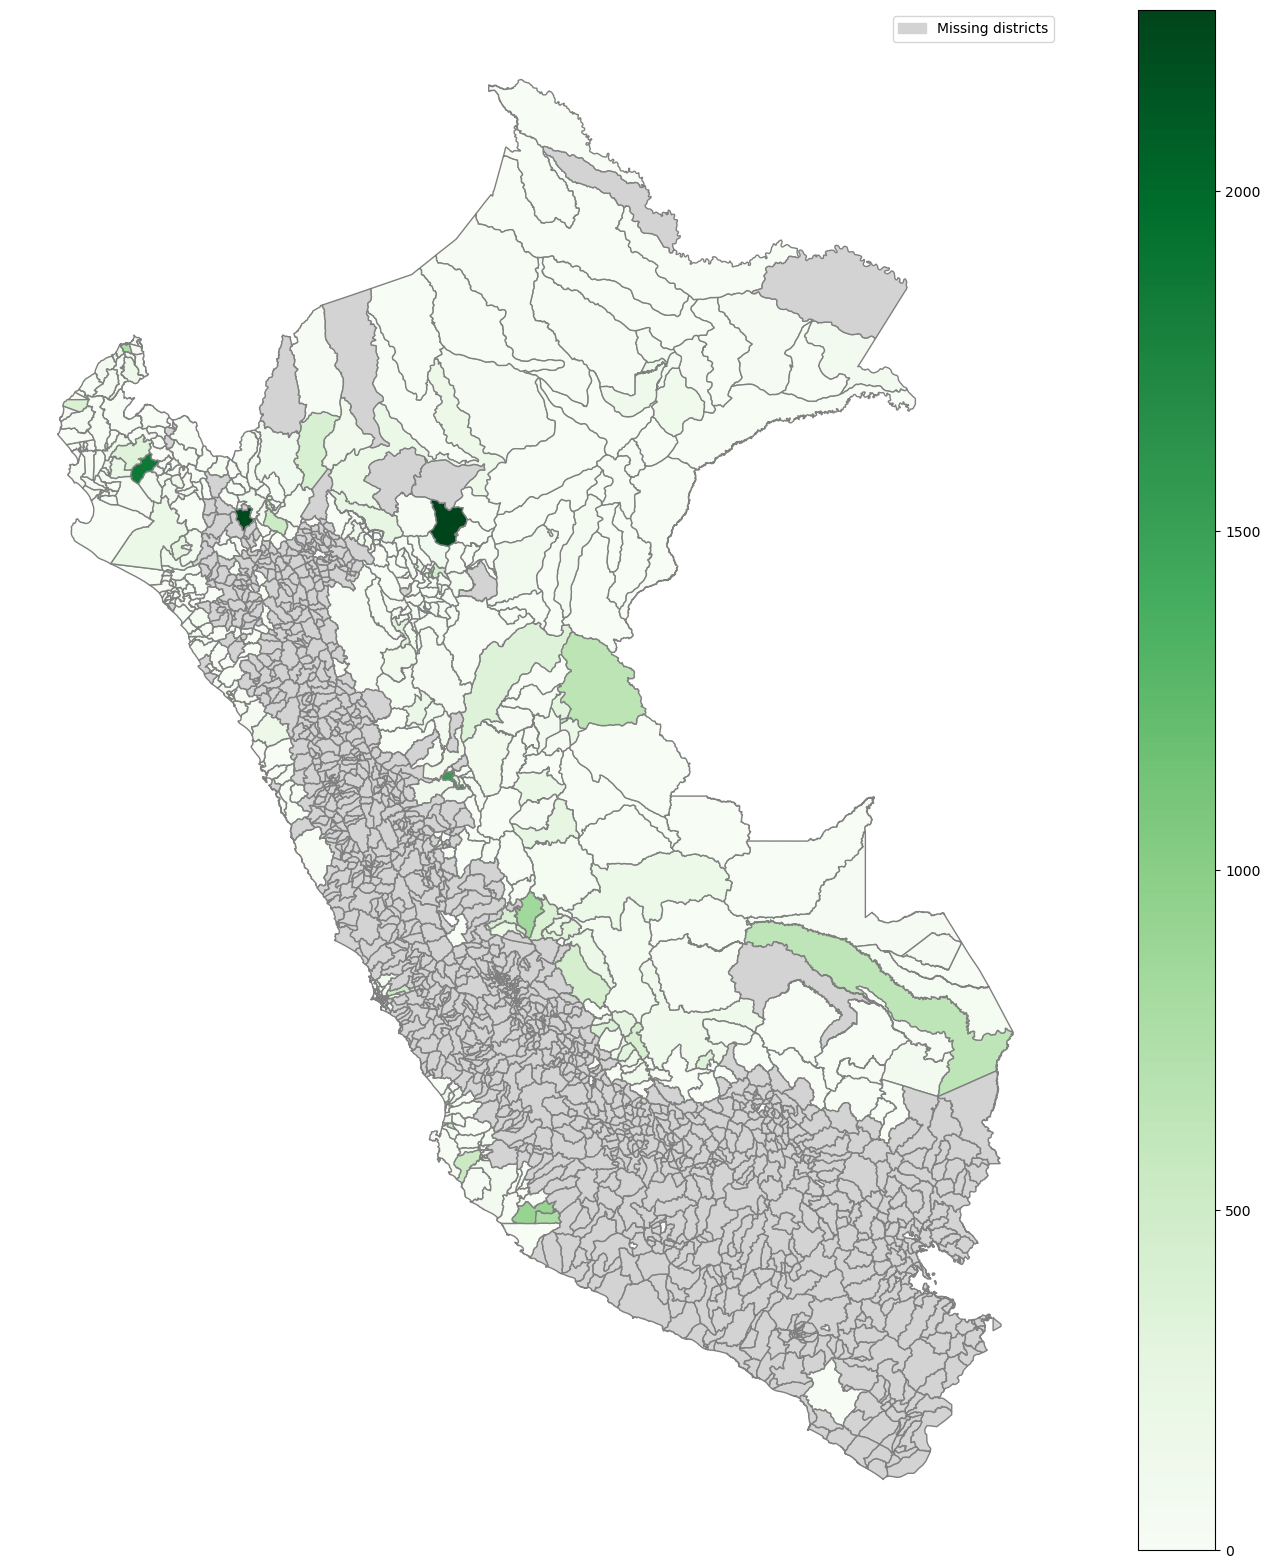

In [24]:
# Finalmente, realizamos el gráfico 
df_coll1 = df_coll1.set_geometry('geometry')
df_coll1.plot( column='Casos', cmap='Greens', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True,
             missing_kwds={
                 "color": "lightgrey", # Este color representa un gris suave
                 "edgecolor": "gray",
             })

# Creamos la leyenda
missing_patch = mpatches.Patch(color='lightgrey', label='Missing districts')
plt.legend(handles=[missing_patch])

# Desactivamos los ejes
plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.show()

**4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values**

In [25]:
#Utilizamos la data de casos de dengue modificada, para cambiar el nombre de la columna del ubigeo de provincia 
df2_dengue=df1_dengue
df2_dengue = df2_dengue.rename({'ubigeo_prov':'IDPROV'}, axis =1)
df2_dengue.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa,IDPROV
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,NaN,180101,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,NaN,180101,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,NaN,150112,15,1501


In [26]:
#Modificamos el shapefile de los distritos para poder accceder a las geometrias a nivel de provincia
prov_shp = maps.dissolve( by = 'IDPROV' )
prov_shp = prov_shp.reset_index()
prov_shp.head(3)

,IDPROV,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [27]:
#Seleccionamos las columnas mas relevantes  
maps2 = prov_shp[['IDPROV', 'geometry']]
maps2.head(5)

,IDPROV,geometry
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948..."
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565..."
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037..."
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475..."
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693..."


In [28]:
#Hacemos el merge del nuevo shape file con la base de casos
df_m2 = pd.merge(maps2, df2_dengue, on="IDPROV")
df_m2.head(3)

,IDPROV,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,41,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,010101,01
1,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,42,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,010101,01
2,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,43,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,010101,01


In [29]:
#Procedemos a reemplazar los datos NA con -1, para ello verificamos si el valor no es una cadena de texto
df_m2['Casos'] = df_m2['Casos'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df_m2['Casos'] = df_m2['Casos'].fillna(-1).astype(int)
df_m2.head(3)

,IDPROV,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,41,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,-1,010101,01
1,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,42,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,-1,010101,01
2,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,43,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,-1,010101,01


In [30]:
#Elimino las filas que tienen -1 en el la columna "Casos"
df_m2 = df_m2[df_m2['Casos'] >= 0]
df_m2.head(3)

,IDPROV,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa
13,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,22,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0,010101,01
14,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,23,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0,010101,01
15,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,24,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0,010101,01


In [31]:
#Procedo a hacer un collapse para mantener una sola observación por distrito sumando los casos de las semanas

# Crear un diccionario con las operaciones para cada columna
operations = {col: 'first' for col in df_m2.columns if col != 'IDPROV'}
operations['Casos'] = 'sum'  # La columna 'Casos' se sumará

# Sumar los casos de dengue por distrito y mantener las demás columnas
df2_coll = df_m2.groupby('IDPROV').agg(operations).reset_index()
df2_coll

#Borro columna semana
df2_coll=df2_coll.drop("Semana", axis=1)

df2_coll.head(3)

,IDPROV,geometry,Año,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0,010101,01
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",2021,Dengue,AMAZONAS,ARAMANGO,BAGUA,676,010202,01
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",2021,Dengue,AMAZONAS,FLORIDA,BONGARA,0,010306,01


In [32]:
#Procedemos a volver a mergear la data df_coll con el shapefile maps1, para tener NA en la columna "Casos" para aquellos
#distritos que no aparecen en la data df_coll
df2_coll1 = pd.merge(maps2, df2_coll, on="IDPROV", how='left')
df2_coll1=df2_coll1.drop("geometry_y",axis=1)
df2_coll1=df2_coll1.rename({'geometry_x':'geometry'}, axis =1 )
df2_coll1

,IDPROV,geometry,Año,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIGEO,ubigeo_depa
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021.0,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0.0,010101,01
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",2021.0,Dengue,AMAZONAS,ARAMANGO,BAGUA,676.0,010202,01
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",2021.0,Dengue,AMAZONAS,FLORIDA,BONGARA,0.0,010306,01
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",2021.0,Dengue,AMAZONAS,RIO SANTIAGO,CONDORCANQUI,435.0,010403,01
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",2021.0,Dengue,TUMBES,PAPAYAL,ZARUMILLA,72.0,240304,24
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",2021.0,Dengue,UCAYALI,IPARIA,CORONEL PORTILLO,1241.0,250103,25
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",2021.0,Dengue,UCAYALI,YURUA,ATALAYA,179.0,250204,25
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",2021.0,Dengue,UCAYALI,ALEXANDER VON HUMBOLDT,PADRE ABAD,193.0,250305,25


<Axes: >

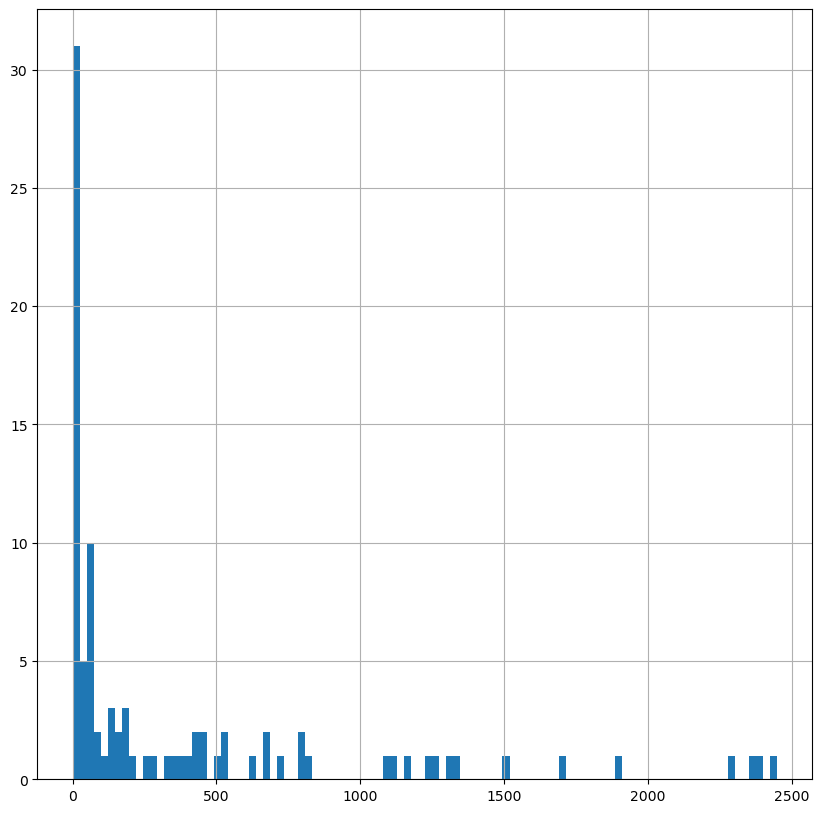

In [33]:
# Ahora bien, antes de realizar el gráfico verificamos la distribución de nuestra serie 
fig, ax = plt.subplots(figsize=(10, 10))
df2_coll1["Casos"].hist(bins = 100)

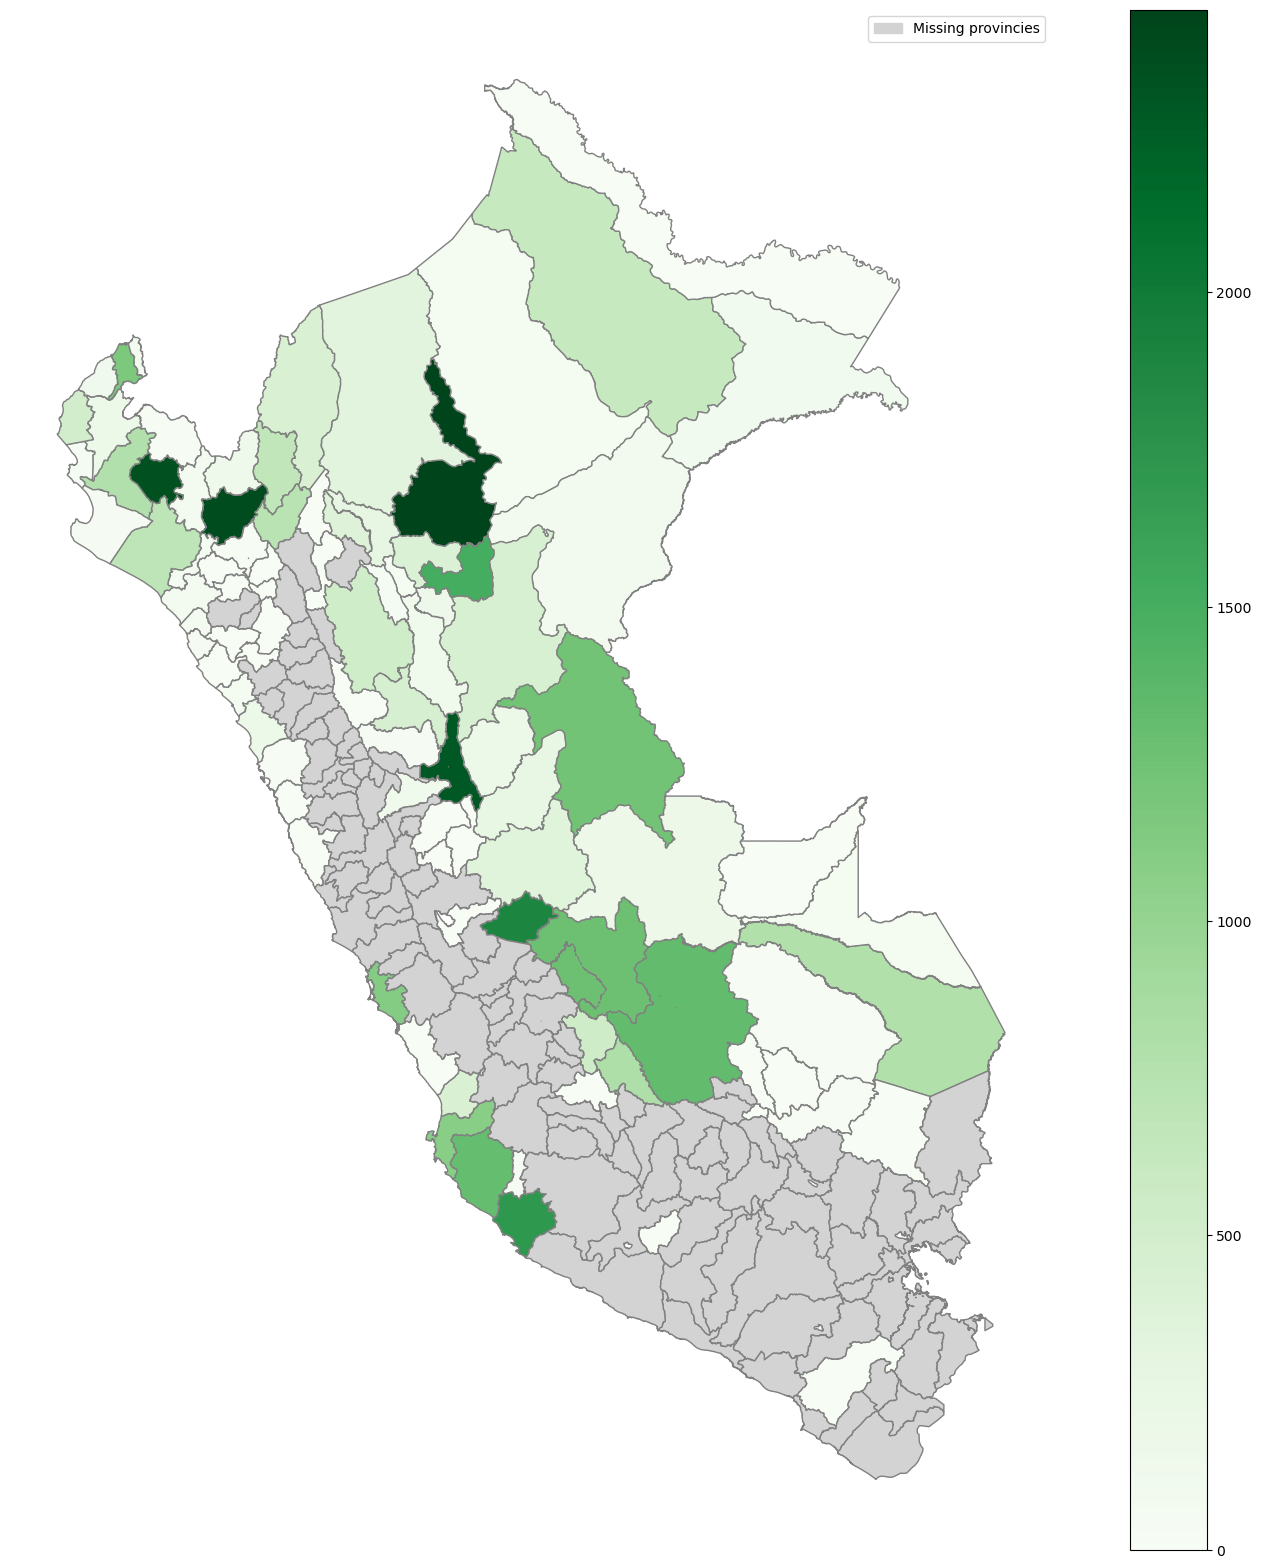

In [34]:
# Finalmente, realizamos el gráfico 
df2_coll1 = df2_coll1.set_geometry('geometry')
df2_coll1.plot( column='Casos', cmap='Greens', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True,
             missing_kwds={
                 "color": "lightgrey", # Este color representa un gris suave
                 "edgecolor": "gray",
             })

# Creamos la leyenda
missing_patch = mpatches.Patch(color='lightgrey', label='Missing provincies')
plt.legend(handles=[missing_patch])

# Desactivamos los ejes
plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.show()

**5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year.**

In [35]:
#Utilizamos la data de casos de dengue para cambiar el nombre de la columna del ubigeo de departamento
df3_dengue=df_dengue
df3_dengue = df_dengue.rename({'ubigeo_depa':'CCDD'}, axis =1)
df3_dengue.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_1,CCDD,ubigeo_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,1801


In [36]:
#Modificamos el shapefile de los distritos para poder accceder a las geometrias a nivel de departamento
dep_shp = maps.dissolve( by = 'CCDD' )
dep_shp = dep_shp.reset_index()
#Seleccionamos las columnas mas relevantes  
maps3 = dep_shp[['CCDD', 'geometry']]
maps3

,CCDD,geometry
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,05,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,06,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,09,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,10,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [37]:
#Hacemos el merge del nuevo shape file con la base de casos
df_m3 = pd.merge(maps3, df3_dengue, on="CCDD")
df_m3

,CCDD,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_1,ubigeo_prov
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,EL PARCO,BAGUA,10204,NaN,010204,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,COPALLIN,BAGUA,10203,NaN,010203,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,10701,NaN,010701,0107
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,EL PARCO,BAGUA,10204,NaN,010204,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,COPALLIN,BAGUA,10203,NaN,010203,0102
...,...,...,...,...,...,...,...,...,...,...,...,...
172139,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,49,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,250301,2503
172140,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,50,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,250301,2503
172141,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,51,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,250301,2503
172142,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,52,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,250301,2503


In [38]:
#Procedemos a reemplazar los datos NA con -1, para ello verificamos si el valor no es una cadena de texto
df_m3['Casos'] = df_m3['Casos'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df_m3['Casos'] = df_m3['Casos'].fillna(-1).astype(int)

#Elimino las filas que tienen -1 en el la columna "Casos"
df_m3 = df_m3[df_m3['Casos'] >= 0]
df_m3.head(3)

,CCDD,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_1,ubigeo_prov
130,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2018,19,Dengue,AMAZONAS,BAGUA,BAGUA,10201,1,010201,0102
131,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2018,22,Dengue,AMAZONAS,BAGUA,BAGUA,10201,1,010201,0102
132,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2018,37,Dengue,AMAZONAS,BAGUA,BAGUA,10201,1,010201,0102


In [39]:
operations = {col: 'first' for col in df_m3.columns if col != 'CCDD' and col != 'Año'}
operations['Casos'] = 'sum'  # La columna 'Casos' se sumará

# Sumar los casos de dengue por distrito y año, manteniendo las demás columnas
df3_coll = df_m3.groupby(['CCDD', 'Año']).agg(operations).reset_index()

# Borrar la columna 'Semana' si existe
if 'Semana' in df3_coll.columns:
    df3_coll = df3_coll.drop("Semana", axis=1)

df3_coll

,CCDD,Año,geometry,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_1,ubigeo_prov
0,01,2015,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",Dengue,AMAZONAS,BAGUA,BAGUA,10201,37,010201,0102
1,01,2016,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",Dengue,AMAZONAS,BAGUA,BAGUA,10201,90,010201,0102
2,01,2017,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",Dengue,AMAZONAS,BAGUA,BAGUA,10201,93,010201,0102
3,01,2018,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",Dengue,AMAZONAS,BAGUA,BAGUA,10201,109,010201,0102
4,01,2019,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",Dengue,AMAZONAS,CAJARURO,UTCUBAMBA,10702,164,010702,0107
...,...,...,...,...,...,...,...,...,...,...,...
142,25,2017,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",Dengue,UCAYALI,SEPAHUA,ATALAYA,250202,779,250202,2502
143,25,2018,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",Dengue,UCAYALI,MANANTAY,CORONEL PORTILLO,250107,317,250107,2501
144,25,2019,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",Dengue,UCAYALI,RAYMONDI,ATALAYA,250201,214,250201,2502
145,25,2020,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",Dengue,UCAYALI,NUEVA REQUENA,CORONEL PORTILLO,250106,10934,250106,2501


In [40]:
ccdd_unique = df3_coll['CCDD'].unique()
print(ccdd_unique)

['01' '02' '05' '06' '07' '08' '10' '11' '12' '13' '14' '15' '16' '17'
 '18' '19' '20' '21' '22' '24' '25']


In [41]:
#Procedemos a volver a mergear la data df_coll con el shapefile maps1, para tener NA en la columna "Casos" para aquellos departamentos que no aparecen en la data df_coll
df3_coll1 = pd.merge(maps3, df3_coll, on="CCDD", how='left')
df3_coll1=df3_coll1.drop("geometry_y",axis=1)
df3_coll1=df3_coll1.rename({'geometry_x':'geometry'}, axis =1 )
df3_coll1

,CCDD,geometry,Año,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_1,ubigeo_prov
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2015.0,Dengue,AMAZONAS,BAGUA,BAGUA,10201.0,37.0,010201,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2016.0,Dengue,AMAZONAS,BAGUA,BAGUA,10201.0,90.0,010201,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2017.0,Dengue,AMAZONAS,BAGUA,BAGUA,10201.0,93.0,010201,0102
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2018.0,Dengue,AMAZONAS,BAGUA,BAGUA,10201.0,109.0,010201,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2019.0,Dengue,AMAZONAS,CAJARURO,UTCUBAMBA,10702.0,164.0,010702,0107
...,...,...,...,...,...,...,...,...,...,...,...
146,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2017.0,Dengue,UCAYALI,SEPAHUA,ATALAYA,250202.0,779.0,250202,2502
147,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2018.0,Dengue,UCAYALI,MANANTAY,CORONEL PORTILLO,250107.0,317.0,250107,2501
148,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019.0,Dengue,UCAYALI,RAYMONDI,ATALAYA,250201.0,214.0,250201,2502
149,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2020.0,Dengue,UCAYALI,NUEVA REQUENA,CORONEL PORTILLO,250106.0,10934.0,250106,2501


In [42]:
ccdd_unique = df3_coll1['CCDD'].unique()
print(ccdd_unique)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25']


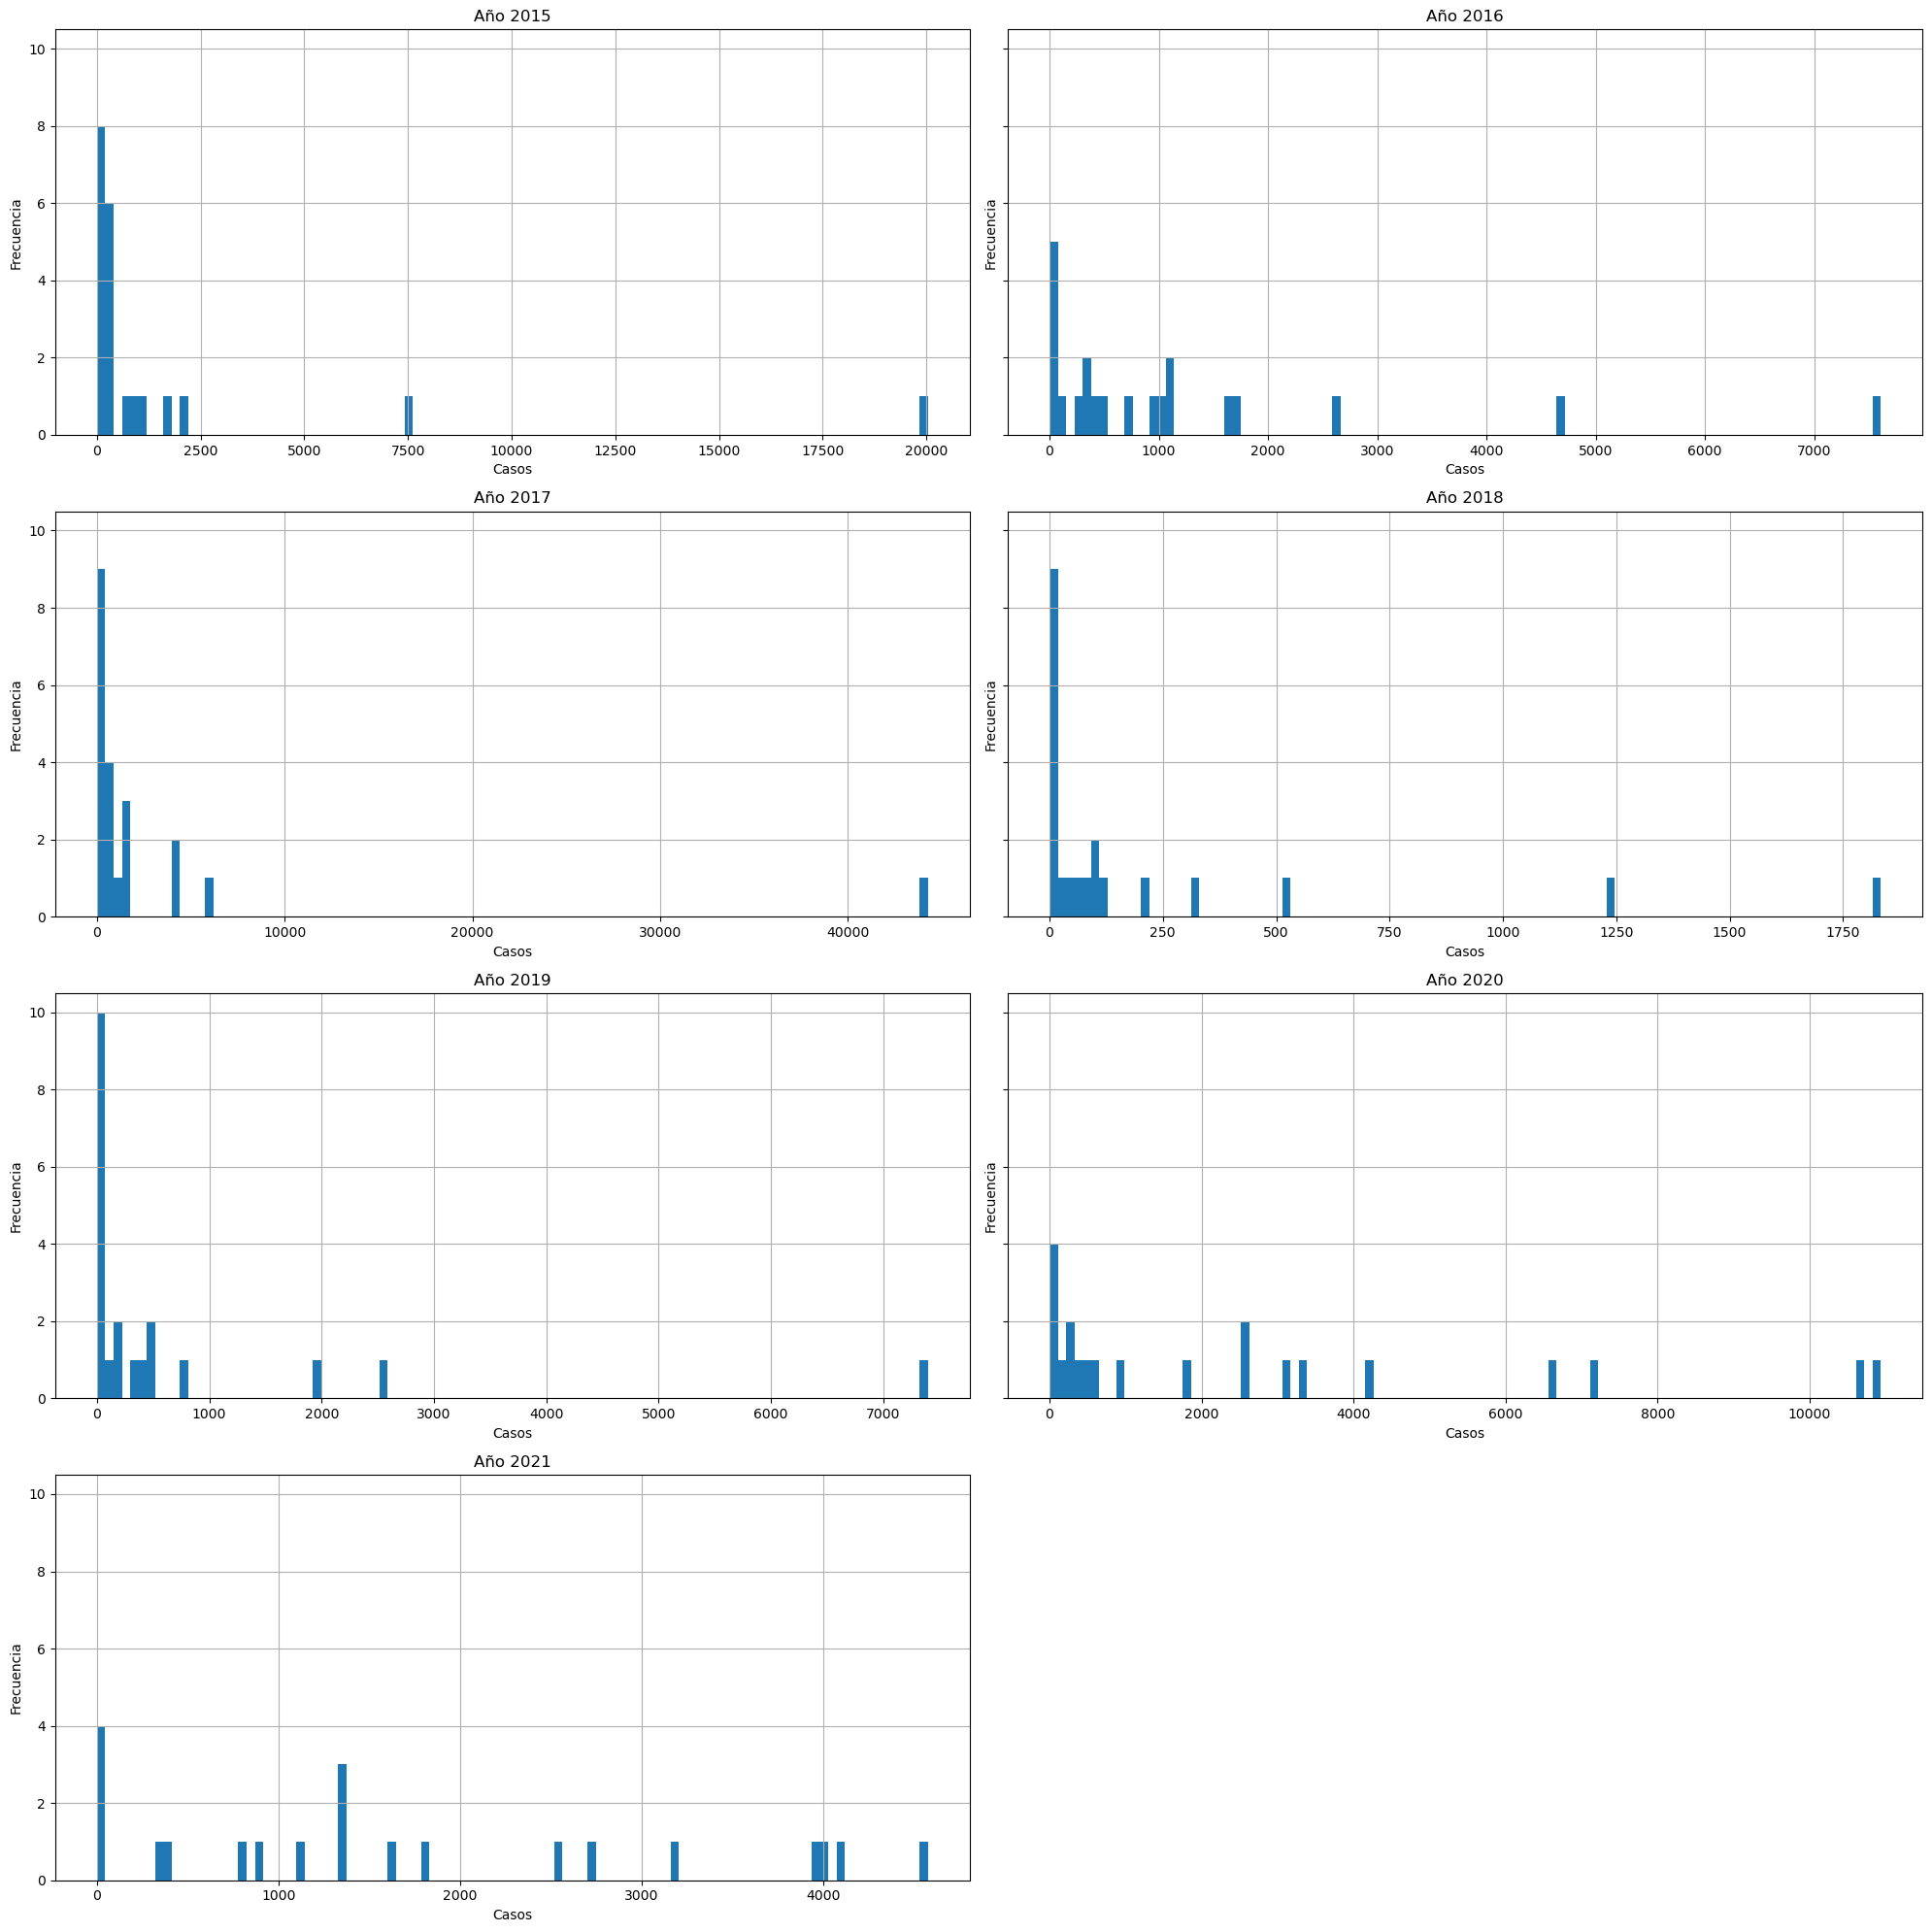

In [43]:
# Verificamos la distribución de nuestra serie 

# Obtener los años únicos excluyendo missings
unique_years = df3_coll1['Año'].dropna().unique()

# Se establece el número de filas y columnas para los subplots
num_rows = 4
num_cols = 2

# Crear subplots para cada año
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20), sharey=True)

# Iterar sobre cada año y dibujar un histograma en cada subplot
for i, year in enumerate(unique_years):
    row = i // num_cols  # Calcular el índice de la fila
    col = i % num_cols   # Calcular el índice de la columna
    
    ax = axes[row, col]  # Obtener el subplot correspondiente
    df_year = df3_coll1[df3_coll1['Año'] == year]
    df_year["Casos"].hist(bins=100, ax=ax)
    ax.set_title(f'Año {int(year)}')
    ax.set_xlabel('Casos')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots no utilizados
for i in range(len(unique_years), num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


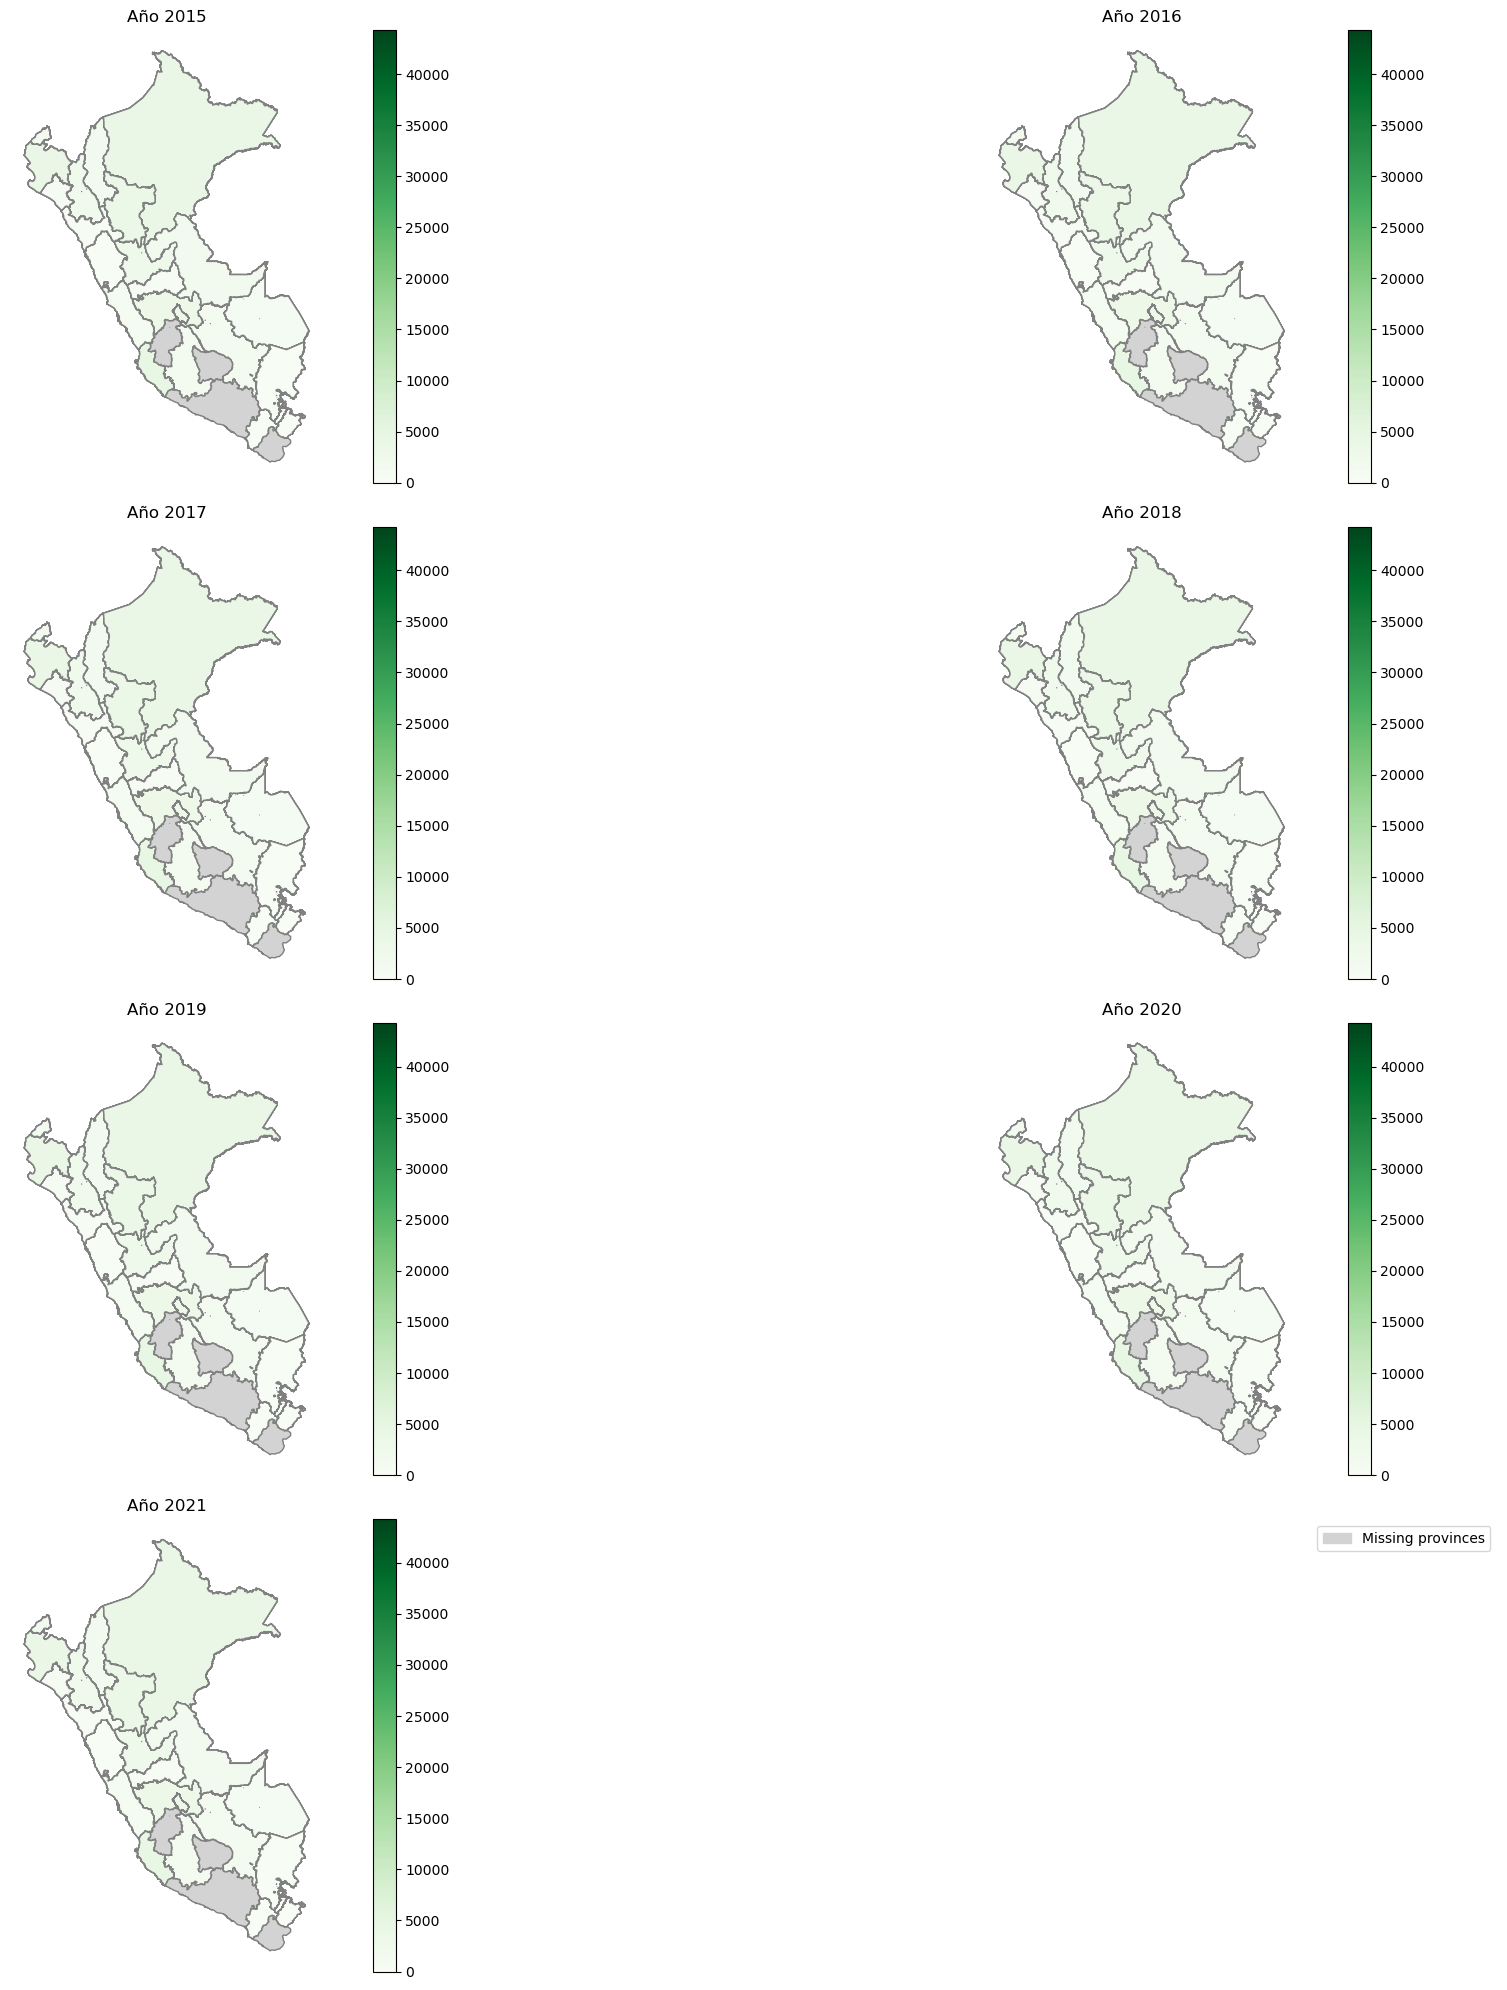

In [44]:
# Obtener los años únicos en tus datos
unique_years = df3_coll1['Año'].dropna().unique()

# Calcular el número de filas y columnas para los subplots
num_rows = 4
num_cols = 2

# Crear subplots para cada año
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Iterar sobre cada año y dibujar el mapa correspondiente
for i, year in enumerate(unique_years):
    row = i // num_cols  # Calcular el índice de la fila
    col = i % num_cols   # Calcular el índice de la columna
    
    ax = axes[row, col]  # Obtener el eje correspondiente
    ax.set_title(f'Año {int(year)}')  # Establecer el título del subplot sin decimales
    df_year = df3_coll1.set_geometry('geometry')
    df_year.plot(column='Casos', cmap='Greens', ax=ax, linestyle='-', edgecolor='gray', legend=True,
                 missing_kwds={"color": "lightgrey", "edgecolor": "gray"})
    ax.axis('off')  # Desactivar los ejes
    ax.set_aspect('equal')  # Establecer el aspecto del eje como igual

# Crear la leyenda
missing_patch = mpatches.Patch(color='lightgrey', label='Missing provinces')
plt.legend(handles=[missing_patch])

# Eliminar subplots no utilizados
for i in range(len(unique_years), num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()